# 한글워드크라우드

In [7]:
import re
import nltk
from konlpy.tag import Okt
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
 

* 한글 텍스트 전처리

In [8]:
with open('설선물.txt', encoding='utf-8') as file:
    text = file.read()

In [9]:
text

'이번 설에 남자친구 부모님께 설 선물 해드리고 싶어요\n지금 400일 정도 됐는데 아직 얼굴 뵙고 인사드린적은\n한번도 없어요 근데 남자친구한테 부모님 가져다드리라고\n설 선물 정과? 같은거 주면 부담스러워하실까용,,,\n남자친구가 갑자기 이번설에 인사드리러 가자고 해서\n너무 갑작스러워서 거절했는데 맘에 걸려서요\n---------------------------------------------------------\n안녕하세요~ 연애 부럽네요 ㅋㅋ\n많이 고민되시겟어요...\n이성친구의 부모님은 항상 고민을 하게 만들고\n생각이 많아지게 하지요.....\n정과정도면 과하지 않아서 괜찮을것같아요~\n그리고 400일 정도면 남자친구분께서 부모님께 질문자님에 대해\n충분히 얘기를 많이 햇을것같은데.....\n인사드리는 것도 좋은 방법일것같아요.....\n아들의 여자친구를 반기지 않는 부모는 드라마에서나 빈번한 일이지\n우리내 삶에서는 다들 반겨주시고 좋아해주시더라구요^^\n좋은 결정내리시고 찾아뵙지않더라도 선물을 드리려는 이쁜마음을 응원합니다~\n\n안녕하세요, 할머니께 설 선물을 준비하고 계시는군요\n정말 효심이 깊네요,\n관련 상품을 찾아보았습니다. 즐거운 설명절 되시기를 바랍니다.\nhttps://link.coupang.com/a/L3zYo\nhttps://link.coupang.com/a/L3z3x\nhttps://link.coupang.com/a/L3Abq\n"이 포스팅은 쿠팡 파트너스 활동의 일환으로, 이에 따른 일정액의 수수료를 제공받습니다."\n\n안녕하세요 ’_‘\n보자기 포장으로 되어있어\n보기에도 고급진 포장에 건강까지\n설 선물로 제격인 거 같아요\n꼭 좋은 선물이 되길 바래요\n\n사과즙 추천드립니다\n제가 자주 먹는 사과즙이 있는데\n가격대 한박스당 2만원 선인데 가격도\n적절하고 사과를 통째로 넣어서 그런지\n당도도 좋은거 같아요 아래 정보 드립니다\n\n✔ 주문하기\nhttps://naver.me/xivR2Mm7\n✔1/18까지 주

In [10]:
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['이번', '설', '남자친구', '부모님', '설', '선물', '지금', '정도', '얼굴', '인사']

In [13]:
# 영문자, 숫자, 구두점 제거
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token)
    if item:
       new_tokens.append(item)

* 불용어 정리

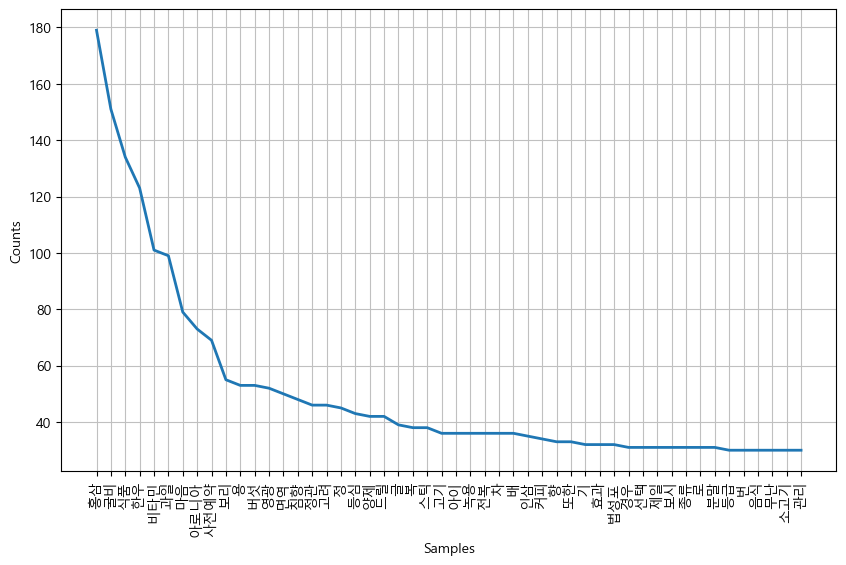

In [33]:
# 불용어 제거후에 반복 수행
gift = nltk.Text(new_tokens, name='설 선물')
plt.figure(figsize=(10, 6))
gift.plot(50)
plt.show()

In [31]:
stoptext = ''' 
선물 세트 추천 제품 것 건강 설 도착 가격 부모님 저 수수료 분 즈 파트너 활동 이 제공 설날 수 명절 구매
도움 정액 상품 거 제 고민 설선물 포장 때 호 더 쿠팡 요 링크 때문 할인 등 개 후기 프리미엄 한번 참고
사용 부담 일환 답변 냉장 요즘 가장 비 준비 쇼핑 판매 질문 고급 곳 스 통해 혼합 산 가성 중 이번 해 생각
배송 어르신 위 아래 냉동 포 인기 확인 채택 종 주문 가지 미리 저희 사람 구성 기능 직접 자 새해 하나 걸 
몸 코로나 정말 지금 맛 전 보고 의미 국내 포스팅 정도 박스 여기 성분 꼭 모두 이상 평
'''

In [32]:
stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]

['남자친구', '얼굴', '인사', '남자친구', '정', '용', '남자친구', '갑자기', '번설', '인사']

* 워드 클라우드 그리기

In [34]:
gift.vocab().most_common(5)

[('홍삼', 179), ('굴비', 151), ('식품', 134), ('한우', 123), ('비타민', 101)]

In [39]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

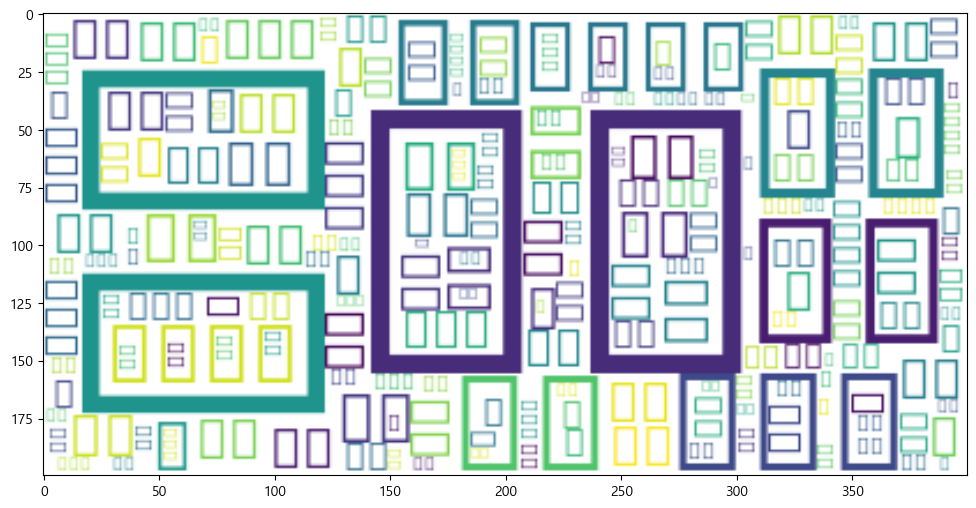

In [40]:
wc = WordCloud(
    background_color='white'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')

(-0.5, 399.5, 199.5, -0.5)

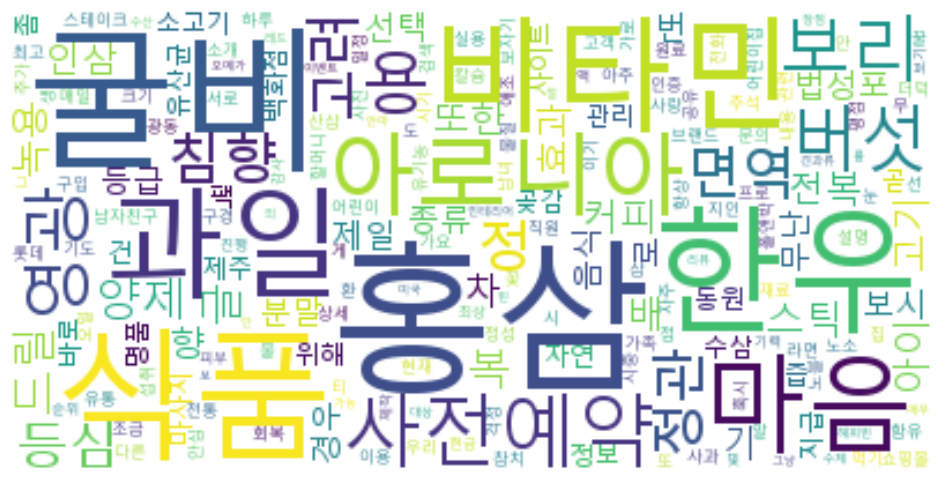

In [42]:
wc = WordCloud(
    background_color='white',
    font_path='C:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

* 그림위에 표시

In [43]:
mask = np.array(Image.open('heart.jpg'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

(-0.5, 766.5, 719.5, -0.5)

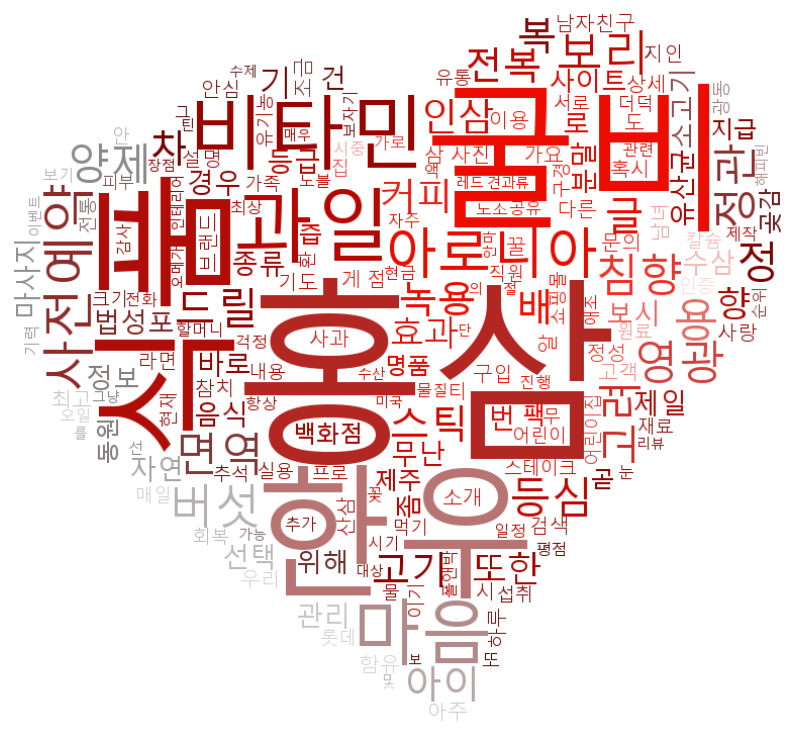

In [56]:
wc = WordCloud(
    background_color='white', random_state = 2023,
    mask=mask, font_path='C:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')